In [161]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [162]:
# load the mnist digit dataset
digits = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = digits.load_data()

In [163]:
x_train.shape

(60000, 28, 28)

In [164]:
x_test.shape

(10000, 28, 28)

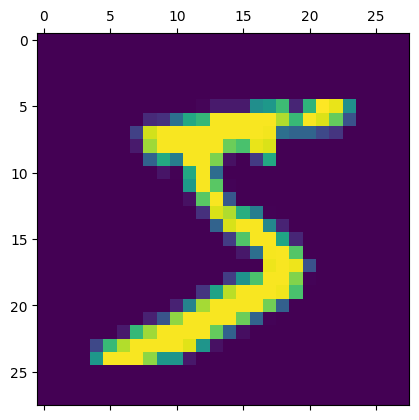

In [165]:
plt.matshow(x_train[0])

In [166]:
y_train[0]

np.uint8(5)

In [167]:
# flatten the data
x_train_reshaped = x_train.reshape((x_train.shape[0], 28 * 28))
x_test_reshaped = x_test.reshape((x_test.shape[0], 28 * 28))
x_train_reshaped.shape, x_test_reshaped.shape

((60000, 784), (10000, 784))

In [168]:
x_train_reshaped[0].shape

(784,)

In [169]:
# Normalize the data
x_train_reshaped = x_train_reshaped / 255.0
x_test_reshaped = x_test_reshaped / 255.0
x_train_reshaped[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [170]:
x_train_reshaped.shape[1]

784

Neural Network with no hidden layer

In [171]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (x_train_reshaped.shape[1],)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_reshaped, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8145 - loss: 0.7205
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9146 - loss: 0.3058
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9177 - loss: 0.2840
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9248 - loss: 0.2691
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9269 - loss: 0.2674
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9277 - loss: 0.2612
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9275 - loss: 0.2553
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9312 - loss: 0.2507
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9299 - loss: 0.2520
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9271 - loss: 0.2594
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9300 - loss: 0.2503
Epoch 12/50
1875/18

In [172]:
model.evaluate(x_test_reshaped, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9164 - loss: 0.3207


[0.2842479348182678, 0.9259999990463257]

In [173]:
coef, bias = model.get_weights()
coef.shape, bias.shape

((784, 10), (10,))

In [174]:
y_pred = model.predict(x_test_reshaped)
for i in range(10):
    print(f"Predicted: {np.argmax(y_pred[i])}, Actual: {y_test[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 6, Actual: 5
Predicted: 9, Actual: 9


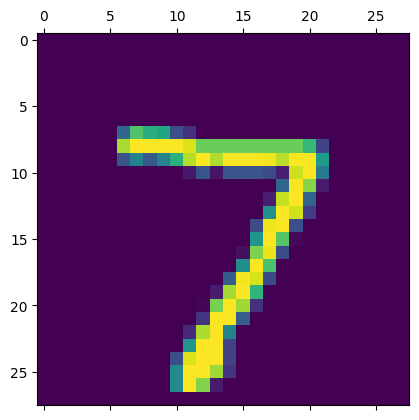

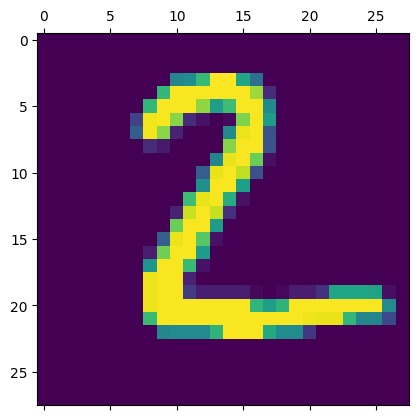

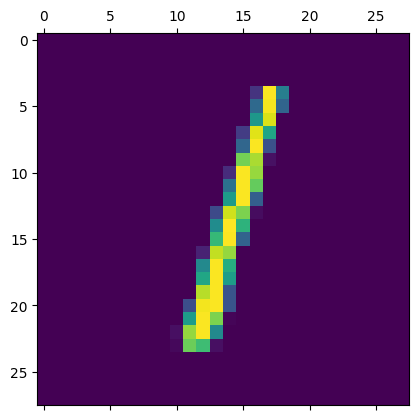

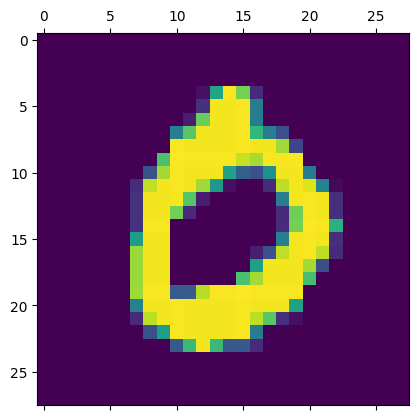

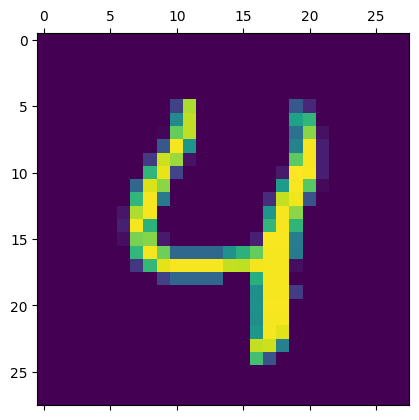

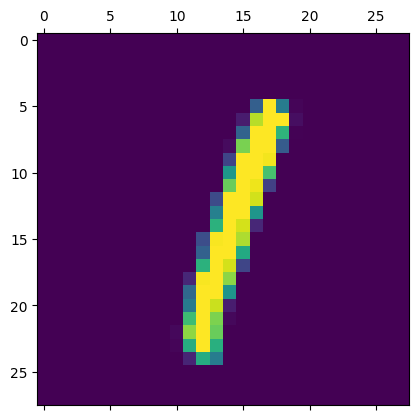

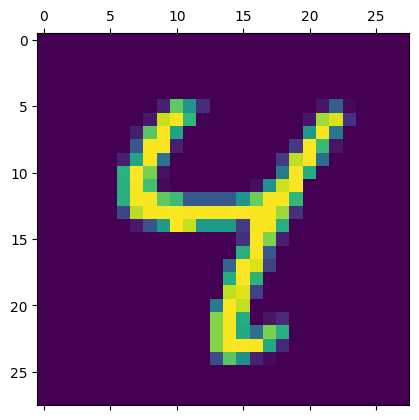

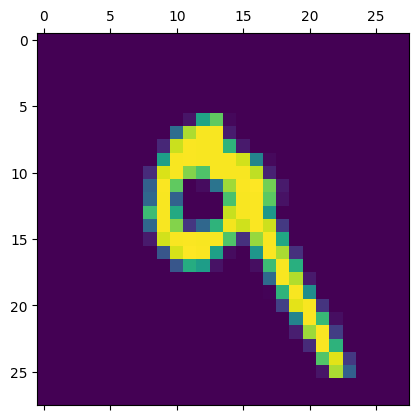

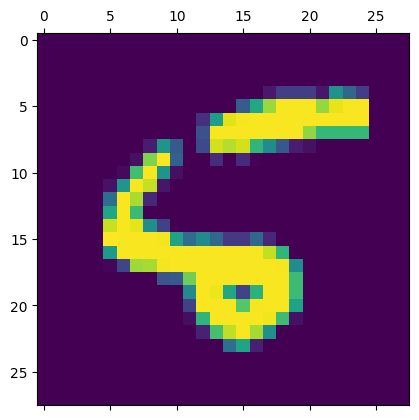

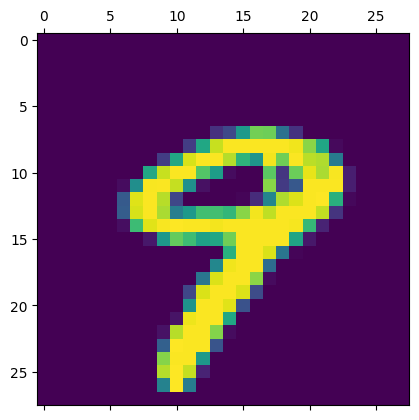

In [175]:
for i in range(10):
    plt.matshow(x_test[i])

In [176]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
y_pred_classes = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))
print("F1 Score:", f1_score(y_test, y_pred_classes, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test, y_pred_classes))
print("Precision Score:", precision_score(y_test, y_pred_classes, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_classes, average='weighted'))

Confusion Matrix:
[[ 961    0    0    2    1    7    5    3    1    0]
 [   0 1111    7    1    0    2    3    2    9    0]
 [   7    6  936   14   10    4   11   10   30    4]
 [   4    1   18  920    1   29    1   10   16   10]
 [   1    3    8    2  908    0    7    9    5   39]
 [  10    3    3   30    6  791   13    7   25    4]
 [  10    3   10    1    6   18  908    1    1    0]
 [   2    7   23    5    3    1    0  950    2   35]
 [   9   10    8   23    7   40    8   11  844   14]
 [  10    8    1   10   17    8    0   20    4  931]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.91      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.95      0.92      0.94       982
           5       0.88      0.89      0.88       892
           6       0.95      0.95      0.95     

In [177]:
# confusion matrix using TensorFlow
tf.math.confusion_matrix(y_test, y_pred_classes)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    1,    7,    5,    3,    1,    0],
       [   0, 1111,    7,    1,    0,    2,    3,    2,    9,    0],
       [   7,    6,  936,   14,   10,    4,   11,   10,   30,    4],
       [   4,    1,   18,  920,    1,   29,    1,   10,   16,   10],
       [   1,    3,    8,    2,  908,    0,    7,    9,    5,   39],
       [  10,    3,    3,   30,    6,  791,   13,    7,   25,    4],
       [  10,    3,   10,    1,    6,   18,  908,    1,    1,    0],
       [   2,    7,   23,    5,    3,    1,    0,  950,    2,   35],
       [   9,   10,    8,   23,    7,   40,    8,   11,  844,   14],
       [  10,    8,    1,   10,   17,    8,    0,   20,    4,  931]],
      dtype=int32)>

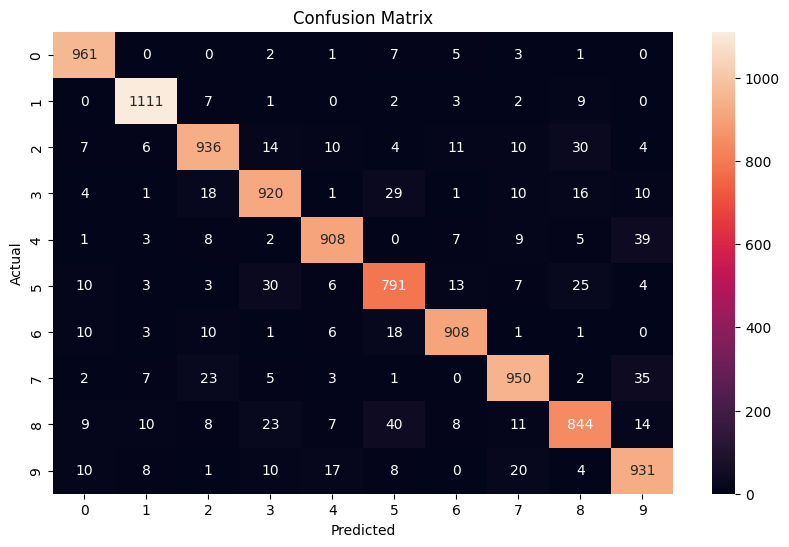

In [178]:
# visualizing the confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now we will use hidden layers to our model to improve the accuracy

In [179]:
model_updated = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train_reshaped.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation = "sigmoid")
])

model_updated.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_updated.fit(x_train_reshaped, y_train, epochs=50)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8778 - loss: 0.4297
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9651 - loss: 0.1201
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9764 - loss: 0.0810
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9821 - loss: 0.0584
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9878 - loss: 0.0403
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9901 - loss: 0.0318
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9922 - loss: 0.0254
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9932 - loss: 0.0220
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9947 - loss: 0.0179
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9963 - loss: 0.0126
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9959 - loss: 0.0132
Epoch 12/50
1875/18

In [180]:
model.evaluate(x_test_reshaped, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9164 - loss: 0.3207


[0.2842479348182678, 0.9259999990463257]

In [181]:
y_pred_updated = model_updated.predict(x_test_reshaped)
y_pred_classes_updated = np.argmax(y_pred_updated, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [182]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_updated))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes_updated))
print("F1 Score:", f1_score(y_test, y_pred_classes_updated, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test, y_pred_classes_updated))
print("Precision Score:", precision_score(y_test, y_pred_classes_updated, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_classes_updated, average='weighted'))

Confusion Matrix:
[[ 971    0    1    0    0    1    3    1    3    0]
 [   0 1124    6    0    0    0    2    1    2    0]
 [   2    6 1011    1    2    0    2    5    2    1]
 [   0    1    6  992    1    2    0    2    1    5]
 [   0    0    4    1  973    0    2    2    0    0]
 [   1    0    1   13    3  863    8    0    3    0]
 [   2    3    2    1   10    2  938    0    0    0]
 [   2    5    9    2    1    0    0  999    4    6]
 [   1    0    5    5    6    2    2    4  946    3]
 [   2    3    0    1   19    3    0    6    1  974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.96      0.99      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98     

In [183]:
for i in range(10):
    print(f"Predicted: {y_pred_classes_updated[i]}, Actual: {y_test[i]}")

Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9


Here it is clear that the performane of the model has been improved. We have tested first 10 data as predicted and actual value. Previously without any hidden layers our model predicted the 9th digit as 6 where it is actually 5. But now adding only one hidden layer the model now predicting the 9th value correctly. 

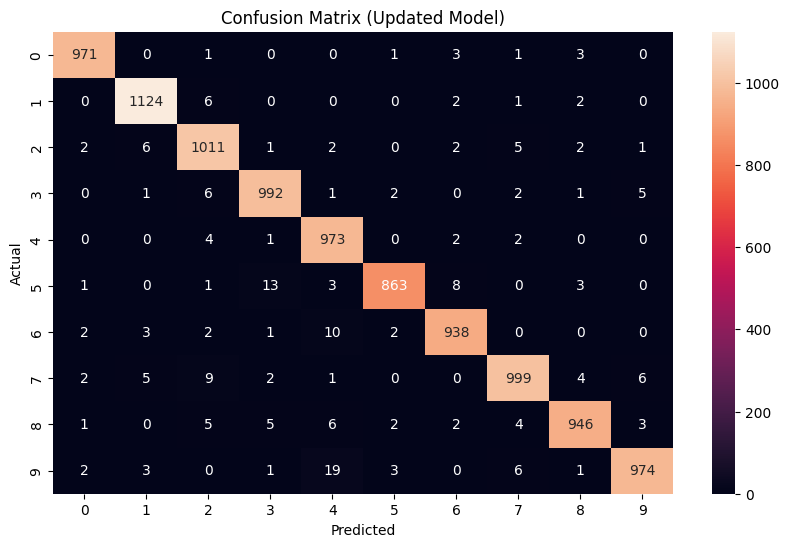

In [184]:
# visualize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes_updated), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Updated Model)')
plt.show()

In the confusion matrix the digits in the black area has been lowered than the previous one.

Tensorboard log

In [185]:
# Using SGD optimizer
model_updated = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train_reshaped.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation = "sigmoid")
])

tb_callback = keras.callbacks.TensorBoard(log_dir = "log/SGD", histogram_freq = 1)

model_updated.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_updated.fit(x_train_reshaped, y_train, epochs=50, callbacks=[tb_callback])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7330 - loss: 1.0214
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9000 - loss: 0.3575
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9154 - loss: 0.3020
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9257 - loss: 0.2712
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9322 - loss: 0.2439
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9367 - loss: 0.2270
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9417 - loss: 0.2099
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9453 - loss: 0.1978
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9492 - loss: 0.1801
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9537 - loss: 0.1679
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9556 - loss: 0.1609
Epoch 12/50
1875/1875 ━━━━

In [187]:
model.evaluate(x_test_reshaped, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.3207


[0.2842479348182678, 0.9259999990463257]

In [186]:
# Using adam optimizer
model_updated = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train_reshaped.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation = "sigmoid")
])

tb_callback = keras.callbacks.TensorBoard(log_dir = "log/adam", histogram_freq = 1)

model_updated.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_updated.fit(x_train_reshaped, y_train, epochs=50, callbacks=[tb_callback])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8805 - loss: 0.4252
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.1160
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0768
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9840 - loss: 0.0521
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0399
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0309
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9930 - loss: 0.0244
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0198
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0158
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0136
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9972 - loss: 0.0104
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━